### Sentiment Analysis from Amazon app store review
#### Introduction
    Proyek ini merupakan sentiment analysis dari review applikasi Amazon di AppStore. Tujuannya untuk memprediksi sentiment dari review yang diberikan user kedalam 5 kelas yaitu VERY NEGATIVE, NEGATIVE, NEUTRAL, POSITIVE, VERY POSITIVE, dan jika diartikan dalam 3 kelas
    VERY NEGATIVE, NEGATIVE -> NEGATIVE
    NEUTRAL -> NEUTRAL
    POSITIVE, VERY POSITIVE -> POSITIVE
#### Data
    Data diperoleh dari hasil scrap review Amazon di AppStore dengan 10000 dataset
#### Problem
    1. Pelabelan dilakukan dengan menggunakan pretrained model bert dari transformer dan sama sekali tidak melakukan pelabelan dari data rating review aplikasi
    2. Distribusi data yang imbalance menyebabkan overfitting dan akurasi validasi tidak meningkat, solusinya dilakukan oversampling data sehinga data mengingkat menjadi 30 ribu lebih dan distribusi data menjadi  seimbang untuk masing-masing kelas
    
#### Algoritm
    Algoritma yang coba digunakan adalah SVM, LSTM, dan GRU
#### Result
    Hasil dari algoritma yang digunakan adalah sebagai berikut
    SVM = 96%
    LSTM = 97%
    GRU = 97%

    Hasil testing prediksi kata baru dapat dilihat dibawah

#### Nama : Andi Sadapotto
#### Email : andi.sadapotto.m@gmail.com




In [53]:
file_path = 'amazon_app_store_reviews_remove_duplicate.csv'
file_path_labeled_dataset= "amazon_app_store_labeled.csv"
slang_word_path = 'slang_word_english.json'

In [54]:
# load scrap dataset csv
import pandas as pd
from matplotlib import pyplot as plt

dataset_df = pd.read_csv(file_path)

dataset_df

,user_name,title,rating,review,date,response
0,ThomasDav,Absolutely Hate the New UI and Color Crime,5,"I’m not normally one to complain, but the new ...",2020-06-04 04:33:14,NaN
1,Why wont my names work,Not the app but the actual company,1,"I dislike them, they’ve gotten worse, now our ...",2022-10-21 03:15:50,NaN
2,Lordsearider,Up grade destroyed it,1,After the last several upgrades for the I-Pad ...,2021-09-12 13:45:55,NaN
3,User111111111111,The app is stillClunky and missing features,1,The app is still missing key features to make ...,2023-05-12 01:28:55,NaN
4,Sooxi54327,It’s like asking a burglar to manage your money,2,It’s even worse than before. Nothing has been ...,2023-01-12 12:10:55,NaN
...,...,...,...,...,...,...
9995,valkimmy,Great,5,"Works well , has been shipping everything safe...",2020-04-27 14:50:05,NaN
9996,15964kn,Bad Update: no Wish Lists,2,Recent update very frustrating to long time us...,2020-05-24 15:16:02,NaN
9997,kannv4,Less user friendly,2,I liked the previous version much better and g...,2020-05-02 05:24:15,NaN
9998,FireMedicDavid,Must Reinstall After Update,5,While updating the app will result in it not w...,2020-04-23 12:45:36,NaN


In [55]:
# menampilkan info dataframe
dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_name  10000 non-null  object 
 1   title      10000 non-null  object 
 2   rating     10000 non-null  int64  
 3   review     10000 non-null  object 
 4   date       10000 non-null  object 
 5   response   0 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


In [56]:
# check column dataset
dataset_df.count()

user_name    10000
title        10000
rating       10000
review       10000
date         10000
response         0
dtype: int64

In [57]:
# hapus kolom duplicate
dataset_df = dataset_df.drop_duplicates()
dataset_df


,user_name,title,rating,review,date,response
0,ThomasDav,Absolutely Hate the New UI and Color Crime,5,"I’m not normally one to complain, but the new ...",2020-06-04 04:33:14,NaN
1,Why wont my names work,Not the app but the actual company,1,"I dislike them, they’ve gotten worse, now our ...",2022-10-21 03:15:50,NaN
2,Lordsearider,Up grade destroyed it,1,After the last several upgrades for the I-Pad ...,2021-09-12 13:45:55,NaN
3,User111111111111,The app is stillClunky and missing features,1,The app is still missing key features to make ...,2023-05-12 01:28:55,NaN
4,Sooxi54327,It’s like asking a burglar to manage your money,2,It’s even worse than before. Nothing has been ...,2023-01-12 12:10:55,NaN
...,...,...,...,...,...,...
9995,valkimmy,Great,5,"Works well , has been shipping everything safe...",2020-04-27 14:50:05,NaN
9996,15964kn,Bad Update: no Wish Lists,2,Recent update very frustrating to long time us...,2020-05-24 15:16:02,NaN
9997,kannv4,Less user friendly,2,I liked the previous version much better and g...,2020-05-02 05:24:15,NaN
9998,FireMedicDavid,Must Reinstall After Update,5,While updating the app will result in it not w...,2020-04-23 12:45:36,NaN


In [58]:
dataset_df = dataset_df.drop(columns=['response'])
dataset_df

,user_name,title,rating,review,date
0,ThomasDav,Absolutely Hate the New UI and Color Crime,5,"I’m not normally one to complain, but the new ...",2020-06-04 04:33:14
1,Why wont my names work,Not the app but the actual company,1,"I dislike them, they’ve gotten worse, now our ...",2022-10-21 03:15:50
2,Lordsearider,Up grade destroyed it,1,After the last several upgrades for the I-Pad ...,2021-09-12 13:45:55
3,User111111111111,The app is stillClunky and missing features,1,The app is still missing key features to make ...,2023-05-12 01:28:55
4,Sooxi54327,It’s like asking a burglar to manage your money,2,It’s even worse than before. Nothing has been ...,2023-01-12 12:10:55
...,...,...,...,...,...
9995,valkimmy,Great,5,"Works well , has been shipping everything safe...",2020-04-27 14:50:05
9996,15964kn,Bad Update: no Wish Lists,2,Recent update very frustrating to long time us...,2020-05-24 15:16:02
9997,kannv4,Less user friendly,2,I liked the previous version much better and g...,2020-05-02 05:24:15
9998,FireMedicDavid,Must Reinstall After Update,5,While updating the app will result in it not w...,2020-04-23 12:45:36


In [59]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/andis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/andis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
# cleaning dataset
import re # import regex
import json
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

def text_cleaning(text: str) ->str:
    text = re.sub(r'@\w+','', text) # remove mention
    text = re.sub(r'#\w+','', text) # remove hashtag
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # remove url
    text = re.sub(r'\d+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter tanda baca
    text = re.sub(r'\s+', ' ', text) # menghapus spasi ganda
    text = text.replace('\n', ' ') # mengganti enter menjadi spasi
    text = text.replace('\t', ' ') # mengganti tab menjadi spasi
    text = text.replace('\r', ' ') # mengganti carriage return menjadi spasi
    text = text.replace('\xa0', ' ') # mengganti non-breaking space menjadi space
    text = text.strip(' ') # menghapus karakter spasi di kanan kiri text
    return text

def case_folding(text: str) ->str:
    return text.lower() # mengubah text menjadi huruf kecil

def replace_slang_words(text: str) ->str:
    # load slang words from json
    try:
        slang_words = {}
        with open(slang_word_path, 'r') as f:
            slang_words = json.load(f)
        text = text.lower()

        words = text.split()

        # Gantikan slang words dengan bentuk standar mereka
        new_words = [slang_words.get(word, word) for word in words]

        # Gabungkan kata-kata kembali menjadi string
        return ' '.join(new_words)
    except FileNotFoundError as e:
        print(f'Slang word dictionary not exist: {e}')


def text_tokenizing(text: str) ->str:
    return word_tokenize(text)

# gunakan fungsi ini setelah melakukan tokenize
def text_stemming(text: str) ->str:
    stemmer = SnowballStemmer('english')
    stemmed_text = [stemmer.stem(word) for word in text]
    return ' '.join(stemmed_text)

# gunakan fungsi ini setelah melakukan tokenize
def remove_stopwords(text: str)->str:
    stop_words = set(stopwords.words('english'))
    filtered_text = [word for word in text if word not in stop_words]
    return ' '.join(filtered_text)

In [61]:
# membersihkan text
dataset_df['review_clean'] = dataset_df['review'].apply(text_cleaning)
dataset_df['review_casefolding'] = dataset_df['review_clean'].apply(case_folding)
dataset_df['review_replace_slang'] =  dataset_df['review_casefolding'].apply(replace_slang_words)
dataset_df['review_tokenizing'] = dataset_df['review_replace_slang'].apply(text_tokenizing)
dataset_df['review_stopword'] = dataset_df['review_tokenizing'].apply(remove_stopwords)
dataset_df['review_stemming'] = dataset_df['review_tokenizing'].apply(text_stemming)

dataset_df['title_clean'] = dataset_df['title'].apply(text_cleaning)
dataset_df['title_casefolding'] = dataset_df['title_clean'].apply(case_folding)
dataset_df['title_replace_slang'] =  dataset_df['title_casefolding'].apply(replace_slang_words)
dataset_df['title_tokenizing'] = dataset_df['title_replace_slang'].apply(text_tokenizing)
dataset_df['title_stopword'] = dataset_df['title_tokenizing'].apply(remove_stopwords)
dataset_df['title_stemming'] = dataset_df['title_tokenizing'].apply(text_stemming)


dataset_df

,user_name,title,rating,review,date,review_clean,review_casefolding,review_replace_slang,review_tokenizing,review_stopword,review_stemming,title_clean,title_casefolding,title_replace_slang,title_tokenizing,title_stopword,title_stemming
0,ThomasDav,Absolutely Hate the New UI and Color Crime,5,"I’m not normally one to complain, but the new ...",2020-06-04 04:33:14,Im not normally one to complain but the new ap...,im not normally one to complain but the new ap...,im not normally one to complain but the new ap...,"[im, not, normally, one, to, complain, but, th...",im normally one complain new application updat...,im not normal one to complain but the new appl...,Absolutely Hate the New UI and Color Crime,absolutely hate the new ui and color crime,absolutely hate the new ui and color crime,"[absolutely, hate, the, new, ui, and, color, c...",absolutely hate new ui color crime,absolut hate the new ui and color crime
1,Why wont my names work,Not the app but the actual company,1,"I dislike them, they’ve gotten worse, now our ...",2022-10-21 03:15:50,I dislike them theyve gotten worse now our pac...,i dislike them theyve gotten worse now our pac...,i dislike them theyve gotten worse now our pac...,"[i, dislike, them, theyve, gotten, worse, now,...",dislike theyve gotten worse packages arrived s...,i dislik them theyv gotten wors now our packag...,Not the app but the actual company,not the app but the actual company,not the application but the actual company,"[not, the, application, but, the, actual, comp...",application actual company,not the applic but the actual compani
2,Lordsearider,Up grade destroyed it,1,After the last several upgrades for the I-Pad ...,2021-09-12 13:45:55,After the last several upgrades for the IPad v...,after the last several upgrades for the ipad v...,after the last several upgrades for the ipad v...,"[after, the, last, several, upgrades, for, the...",last several upgrades ipad version longer ipad...,after the last sever upgrad for the ipad versi...,Up grade destroyed it,up grade destroyed it,up grade destroyed it,"[up, grade, destroyed, it]",grade destroyed,up grade destroy it
3,User111111111111,The app is stillClunky and missing features,1,The app is still missing key features to make ...,2023-05-12 01:28:55,The app is still missing key features to make ...,the app is still missing key features to make ...,the application is still missing key features ...,"[the, application, is, still, missing, key, fe...",application still missing key features make us...,the applic is still miss key featur to make it...,The app is stillClunky and missing features,the app is stillclunky and missing features,the application is stillclunky and missing fea...,"[the, application, is, stillclunky, and, missi...",application stillclunky missing features,the applic is stillclunki and miss featur
4,Sooxi54327,It’s like asking a burglar to manage your money,2,It’s even worse than before. Nothing has been ...,2023-01-12 12:10:55,Its even worse than before Nothing has been fi...,its even worse than before nothing has been fi...,its even worse than before nothing has been fi...,"[its, even, worse, than, before, nothing, has,...",even worse nothing fixed improved click switch...,it even wors than befor noth has been fix or i...,Its like asking a burglar to manage your money,its like asking a burglar to manage your money,its like asking a burglar to manage your money,"[its, like, asking, a, burglar, to, manage, yo...",like asking burglar manage money,it like ask a burglar to manag your money
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,valkimmy,Great,5,"Works well , has been shipping everything safe...",2020-04-27 14:50:05,Works well has been shipping everything safe a...,works well has been shipping everything safe a...,works well has been shipping everything safe a...,"[works, well, has, been, shipping, everything,...",works well shipping everything safe perfectly ...,work well has been ship everyth safe a

In [62]:
# drop usesless column
dataset_df = dataset_df.drop(columns=['user_name', 'date','rating'])
dataset_df

,title,review,review_clean,review_casefolding,review_replace_slang,review_tokenizing,review_stopword,review_stemming,title_clean,title_casefolding,title_replace_slang,title_tokenizing,title_stopword,title_stemming
0,Absolutely Hate the New UI and Color Crime,"I’m not normally one to complain, but the new ...",Im not normally one to complain but the new ap...,im not normally one to complain but the new ap...,im not normally one to complain but the new ap...,"[im, not, normally, one, to, complain, but, th...",im normally one complain new application updat...,im not normal one to complain but the new appl...,Absolutely Hate the New UI and Color Crime,absolutely hate the new ui and color crime,absolutely hate the new ui and color crime,"[absolutely, hate, the, new, ui, and, color, c...",absolutely hate new ui color crime,absolut hate the new ui and color crime
1,Not the app but the actual company,"I dislike them, they’ve gotten worse, now our ...",I dislike them theyve gotten worse now our pac...,i dislike them theyve gotten worse now our pac...,i dislike them theyve gotten worse now our pac...,"[i, dislike, them, theyve, gotten, worse, now,...",dislike theyve gotten worse packages arrived s...,i dislik them theyv gotten wors now our packag...,Not the app but the actual company,not the app but the actual company,not the application but the actual company,"[not, the, application, but, the, actual, comp...",application actual company,not the applic but the actual compani
2,Up grade destroyed it,After the last several upgrades for the I-Pad ...,After the last several upgrades for the IPad v...,after the last several upgrades for the ipad v...,after the last several upgrades for the ipad v...,"[after, the, last, several, upgrades, for, the...",last several upgrades ipad version longer ipad...,after the last sever upgrad for the ipad versi...,Up grade destroyed it,up grade destroyed it,up grade destroyed it,"[up, grade, destroyed, it]",grade destroyed,up grade destroy it
3,The app is stillClunky and missing features,The app is still missing key features to make ...,The app is still missing key features to make ...,the app is still missing key features to make ...,the application is still missing key features ...,"[the, application, is, still, missing, key, fe...",application still missing key features make us...,the applic is still miss key featur to make it...,The app is stillClunky and missing features,the app is stillclunky and missing features,the application is stillclunky and missing fea...,"[the, application, is, stillclunky, and, missi...",application stillclunky missing features,the applic is stillclunki and miss featur
4,It’s like asking a burglar to manage your money,It’s even worse than before. Nothing has been ...,Its even worse than before Nothing has been fi...,its even worse than before nothing has been fi...,its even worse than before nothing has been fi...,"[its, even, worse, than, before, nothing, has,...",even worse nothing fixed improved click switch...,it even wors than befor noth has been fix or i...,Its like asking a burglar to manage your money,its like asking a burglar to manage your money,its like asking a burglar to manage your money,"[its, like, asking, a, burglar, to, manage, yo...",like asking burglar manage money,it like ask a burglar to manag your money
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Great,"Works well , has been shipping everything safe...",Works well has been shipping everything safe a...,works well has been shipping everything safe a...,works well has been shipping everything safe a...,"[works, well, has, been, shipping, everything,...",works well shipping everything safe perfectly ...,work well has been ship everyth safe and perfe...,Great,great,great,[great],great,great
9996,Bad Update: no Wish Lists,Recent update very frustrating to long time us...,Recent update very frustrating to long time us...,recent update very frustrating to long time us...,recent update very

In [11]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [12]:
# labeling dataset dengan bert pretrained model
from transformers import pipeline, Pipeline
# import torch
import re

def remove_string(text: str) ->int:
    try:
         text = re.sub(r'\D', '', text)
         return int(text)
    except TypeError as e:
        print(f'Error: {e}')
        return text
    
def generate_text_label(label: int) -> str:
    if label == 1:
        return "VERY NEGATIVE"
    elif label == 2:
        return "NEGATIVE"
    elif label == 3:
        return "NEUTRAL"
    elif label == 4:
        return "POSITVE"
    elif label == 5:
        return "VERY POSITVE"
    
def get_classifier() ->Pipeline:
    # if torch.cuda.is_available():
    #     device = "cuda"
    # elif torch.backends.mps.is_available():
    #     device = "mps"
    # else:
    #     device = "cpu"

    # Menggunakan pipeline dari Hugging Face untuk menentukan label sentiment analysis
    classifier = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment',)
    return classifier
    
# Fungsi untuk mendapatkan label sentimen
def get_sentiment_label(text):
    classifier = get_classifier()
    result = classifier(text)[0]
    label = result['label']
    return label


def labeling_dataset(dataset: pd.DataFrame) ->pd.DataFrame:

    # buat gabungan text dari title dan review
    dataset['text'] = dataset['title_stopword']+ ' '+dataset['review_stopword']

    dataset['label'] = dataset['text'].apply(get_sentiment_label)

    dataset['label'] = dataset['label'].apply(remove_string)
    dataset['label_text'] = dataset['label'].apply(generate_text_label)

    return dataset
    

In [13]:
# save our new dataset
import os

if not os.path.exists(file_path_labeled_dataset):
    dataset_df = labeling_dataset(dataset_df)
    dataset_df.to_csv(file_path_labeled_dataset, index=False)
else:
    dataset_df = pd.read_csv(file_path_labeled_dataset)
    
dataset_df

,title,rating,review,review_clean,review_casefolding,review_replace_slang,review_tokenizing,review_stopword,review_stemming,title_clean,title_casefolding,title_replace_slang,title_tokenizing,title_stopword,title_stemming,sentiment_based_on_review,text,label,label_text
0,Absolutely Hate the New UI and Color Crime,5,"I’m not normally one to complain, but the new ...",Im not normally one to complain but the new ap...,im not normally one to complain but the new ap...,im not normally one to complain but the new ap...,"['im', 'not', 'normally', 'one', 'to', 'compla...",im normally one complain new application updat...,im not normal one to complain but the new appl...,Absolutely Hate the New UI and Color Crime,absolutely hate the new ui and color crime,absolutely hate the new ui and color crime,"['absolutely', 'hate', 'the', 'new', 'ui', 'an...",absolutely hate new ui color crime,absolut hate the new ui and color crime,2,absolutely hate new ui color crime im normally...,1,VERY NEGATIVE
1,Not the app but the actual company,1,"I dislike them, they’ve gotten worse, now our ...",I dislike them theyve gotten worse now our pac...,i dislike them theyve gotten worse now our pac...,i dislike them theyve gotten worse now our pac...,"['i', 'dislike', 'them', 'theyve', 'gotten', '...",dislike theyve gotten worse packages arrived s...,i dislik them theyv gotten wors now our packag...,Not the app but the actual company,not the app but the actual company,not the application but the actual company,"['not', 'the', 'application', 'but', 'the', 'a...",application actual company,not the applic but the actual compani,0,application actual company dislike theyve gott...,1,VERY NEGATIVE
2,Up grade destroyed it,1,After the last several upgrades for the I-Pad ...,After the last several upgrades for the IPad v...,after the last several upgrades for the ipad v...,after the last several upgrades for the ipad v...,"['after', 'the', 'last', 'several', 'upgrades'...",last several upgrades ipad version longer ipad...,after the last sever upgrad for the ipad versi...,Up grade destroyed it,up grade destroyed it,up grade destroyed it,"['up', 'grade', 'destroyed', 'it']",grade destroyed,up grade destroy it,0,grade destroyed last several upgrades ipad ver...,1,VERY NEGATIVE
3,The app is stillClunky and missing features,1,The app is still missing key features to make ...,The app is still missing key features to make ...,the app is still missing key features to make ...,the application is still missing key features ...,"['the', 'application', 'is', 'still', 'missing...",application still missing key features make us...,the applic is still miss key featur to make it...,The app is stillClunky and missing features,the app is stillclunky and missing features,the application is stillclunky and missing fea...,"['the', 'application', 'is', 'stillclunky', 'a...",application stillclunky missing features,the applic is stillclunki and miss featur,0,application stillclunky missing features appli...,1,VERY NEGATIVE
4,It’s like asking a burglar to manage your money,2,It’s even worse than before. Nothing has been ...,Its even worse than before Nothing has been fi...,its even worse than before nothing has been fi...,its even worse than before nothing has been fi...,"['its', 'even', 'worse', 'than', 'before', 'no...",even worse nothing fixed improved click switch...,it even wors than befor noth has been fix or i...,Its like asking a burglar to manage your money,its like asking a burglar to manage your money,its like asking a burglar to manage your money,"['its', 'like', 'asking', 'a', 'burglar', 'to'...",like asking burglar manage money,it like ask a burglar to manag your money,0,like asking burglar manage money even worse no...,1,VERY NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Great,5,"Works well , has been shipping everything safe...",Works well has been shipping everything safe a...,works well has been shipping everything safe a...,work

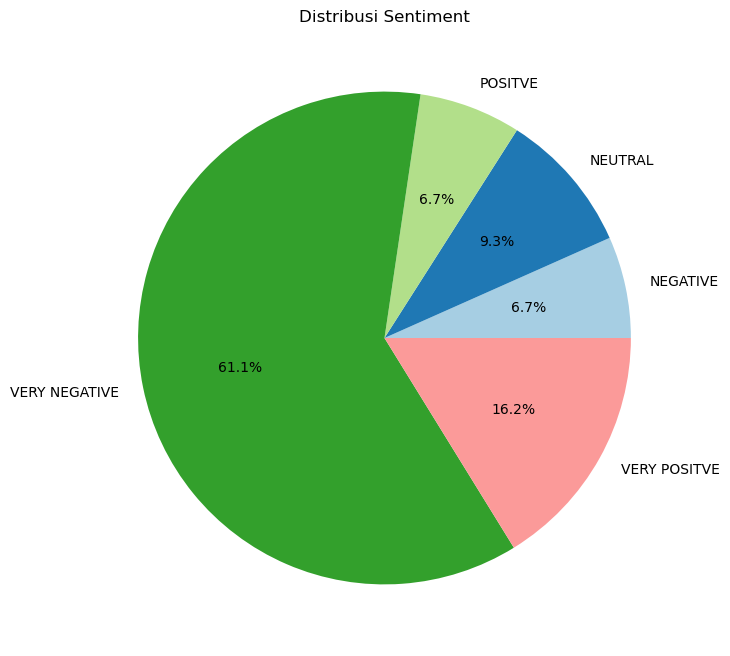

In [14]:
# let see the distribution
# Hitung jumlah review per rating
rating_counts = dataset_df['label_text'].value_counts().sort_index()
class_names =  list(dataset_df['label_text'].value_counts().sort_index().index)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=class_names,autopct='%1.1f%%', colors=plt.cm.Paired(range(len(rating_counts))))
plt.title('Distribusi Sentiment')
plt.show()

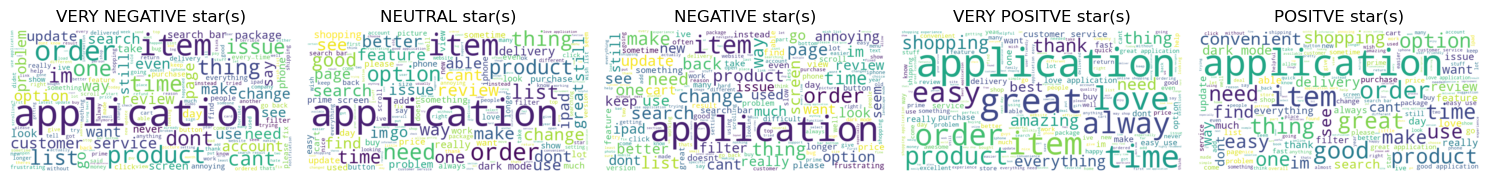

In [15]:
# Pisahkan data berdasarkan label
from wordcloud import WordCloud

data_by_class = {label: " ".join(dataset_df[dataset_df['label_text'] == label]['text']) for label in dataset_df['label_text'].unique()}

# Buat dan plot WordCloud untuk setiap kelas
plt.figure(figsize=(15, 10))
for i, (label, text) in enumerate(data_by_class.items()):
    wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(text)
    plt.subplot(1, len(data_by_class), i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{label} star(s)')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [16]:
# define callback
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001, mode='min', verbose=1)
accuracy_early_stopping_callback = EarlyStopping(
    monitor='val_accuracy',  # Metrik yang dipantau, bisa juga 'val_loss'
    patience=3,              # Berapa epoch tanpa perbaikan sebelum berhenti
    restore_best_weights=True # Mengembalikan bobot terbaik
)

In [17]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


Distribusi Awal:
 label_text
VERY NEGATIVE    6114
VERY POSITVE     1620
NEUTRAL           931
POSITVE           669
NEGATIVE          666
Name: count, dtype: int64


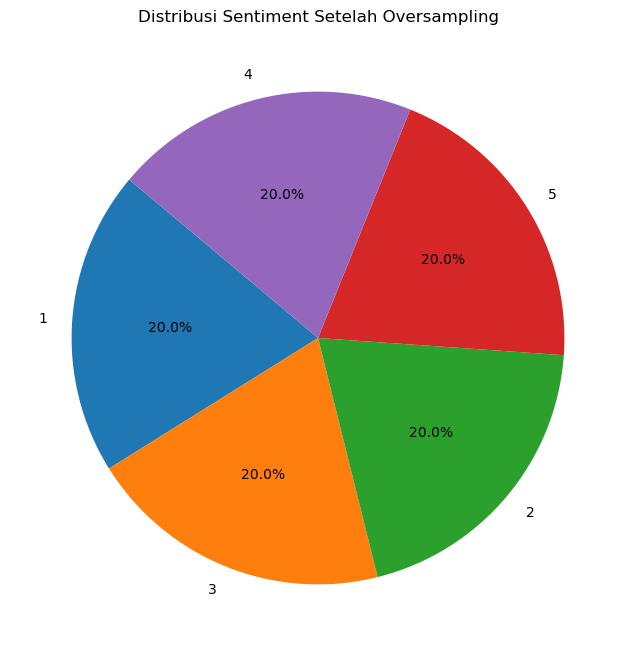

In [18]:
# sepertinya datasetnya imbalance
from imblearn.over_sampling import RandomOverSampler

# simpan dataset kedalam df untuk sementara
df = dataset_df
# Mengecek distribusi awal
print("Distribusi Awal:\n", df['label_text'].value_counts())

# Memisahkan fitur dan label
X = df['text'].values
y = df['label'].values

X = X.reshape(-1, 1)

# Melakukan oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Mengembalikan data ke format DataFrame
resampled_df = pd.DataFrame({'text': X_resampled.flatten(), 'label': y_resampled})

# Menghitung distribusi label
label_counts = resampled_df['label'].value_counts()
labels = label_counts.index
sizes = label_counts.values

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Sentiment Setelah Oversampling')
plt.show()


In [19]:
resampled_df

,text,label
0,absolutely hate new ui color crime im normally...,1
1,application actual company dislike theyve gott...,1
2,grade destroyed last several upgrades ipad ver...,1
3,application stillclunky missing features appli...,1
4,like asking burglar manage money even worse no...,1
...,...,...
30565,amazing service im always ordering company alw...,5
30566,love first got could get every video game need...,5
30567,great price higher retailers part go place eve...,5
30568,thanks convenient disability dont wait long re...,5


In [21]:
#  lets try  with SVM
#  we will use the resampled dataset
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

y = resampled_df['label'].values
x = resampled_df['text'].values

vectorizer = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
x_fitur = vectorizer.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x_fitur, y, test_size=0.2, random_state=42)


new_model_svc = SVC()
new_model_svc.fit(X_train, y_train)

y_predict_train_svc = new_model_svc.predict(X_train)
y_predict_test_svc = new_model_svc.predict(X_test)

accuracy_train_svc = accuracy_score(y_predict_train_svc, y_train)
accuracy_test_svc = accuracy_score(y_predict_test_svc, y_test)

print(f'Accuracy Train with TF-IDF and SVM: {accuracy_train_svc}')
print(f'Accuracy Test with TF-IDF and SVM: {accuracy_test_svc}')

Accuracy Train with TF-IDF and SVM: 0.9903091265947007
Accuracy Test with TF-IDF and SVM: 0.9631992149165849


In [22]:
# save our svm model
import joblib

joblib.dump(new_model_svc, 'svm_model.pkl')

['svm_model.pkl']

In [23]:
# lets train again
# lets try to train with LSTM
# we will use the same data as before
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# split data to train test
X = resampled_df['text']
resampled_df['label'] # 1, 2, 3, 4, 5 -> harus di convert ke 0, 1, 2, 3, 4 (dalam tensorflow label harus mulai dari 0)
y = resampled_df['label'] -1

X = X.values
y = y.values

# Tokenizer untuk mengubah teks menjadi sequences numerik
# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X)
maxlen = 100

def text_padding(text):
    X_sequences = tokenizer.texts_to_sequences(text)
    return pad_sequences(X_sequences, maxlen=maxlen)

X_padded = text_padding(X)

X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)


In [24]:
# build LSTM model
model_lstm = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=50000, output_dim=100, input_length=maxlen),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

model_lstm.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [25]:
# train model LSTM
history_lstm = model_lstm.fit(
      X_train, y_train,
      epochs=15,
      batch_size=64,
      validation_data=(X_test, y_test),
      verbose=2,
      callbacks=[reduce_lr_callback, accuracy_early_stopping_callback]
    )

Epoch 1/15


2024-07-22 11:02:59.561581: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


383/383 - 97s - loss: 1.0753 - accuracy: 0.5291 - val_loss: 0.6200 - val_accuracy: 0.7653 - lr: 0.0010 - 97s/epoch - 252ms/step
Epoch 2/15
383/383 - 99s - loss: 0.4205 - accuracy: 0.8558 - val_loss: 0.2401 - val_accuracy: 0.9195 - lr: 0.0010 - 99s/epoch - 258ms/step
Epoch 3/15
383/383 - 101s - loss: 0.2034 - accuracy: 0.9378 - val_loss: 0.1745 - val_accuracy: 0.9493 - lr: 0.0010 - 101s/epoch - 263ms/step
Epoch 4/15
383/383 - 99s - loss: 0.1296 - accuracy: 0.9627 - val_loss: 0.1475 - val_accuracy: 0.9570 - lr: 0.0010 - 99s/epoch - 258ms/step
Epoch 5/15
383/383 - 92s - loss: 0.0870 - accuracy: 0.9749 - val_loss: 0.1362 - val_accuracy: 0.9601 - lr: 0.0010 - 92s/epoch - 241ms/step
Epoch 6/15
383/383 - 91s - loss: 0.0719 - accuracy: 0.9793 - val_loss: 0.1738 - val_accuracy: 0.9550 - lr: 0.0010 - 91s/epoch - 237ms/step
Epoch 7/15

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
383/383 - 87s - loss: 0.0557 - accuracy: 0.9846 - val_loss: 0.2095 - val_accuracy: 0.9

In [26]:
loss, accuracy = model_lstm.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {accuracy}')

192/192 - 5s - loss: 0.1576 - accuracy: 0.9696 - 5s/epoch - 28ms/step
Test Accuracy: 0.9695780277252197


In [27]:
# saving our models, it's hard to train again
model_lstm.save('lstm_model_sentiment_analysis.h5')

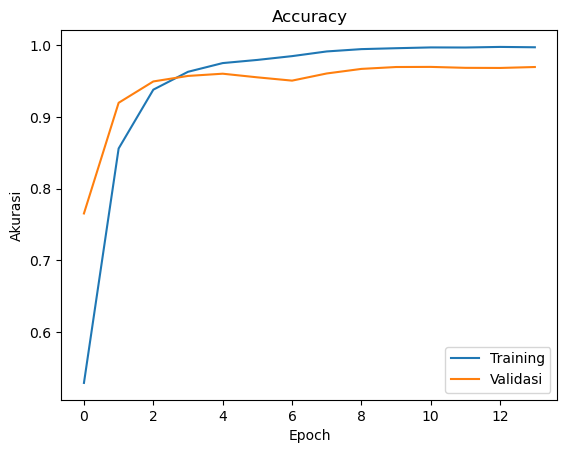

In [28]:
history_lstm.history.keys()
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validasi'], loc='lower right')
plt.show()

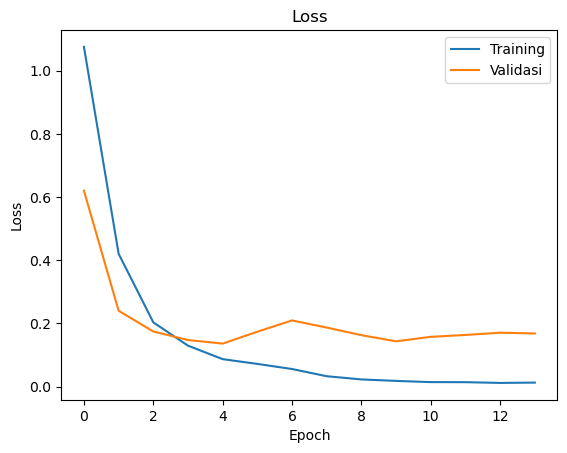

In [29]:
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validasi'], loc='upper right')

192/192 [==============================] - 6s 30ms/step


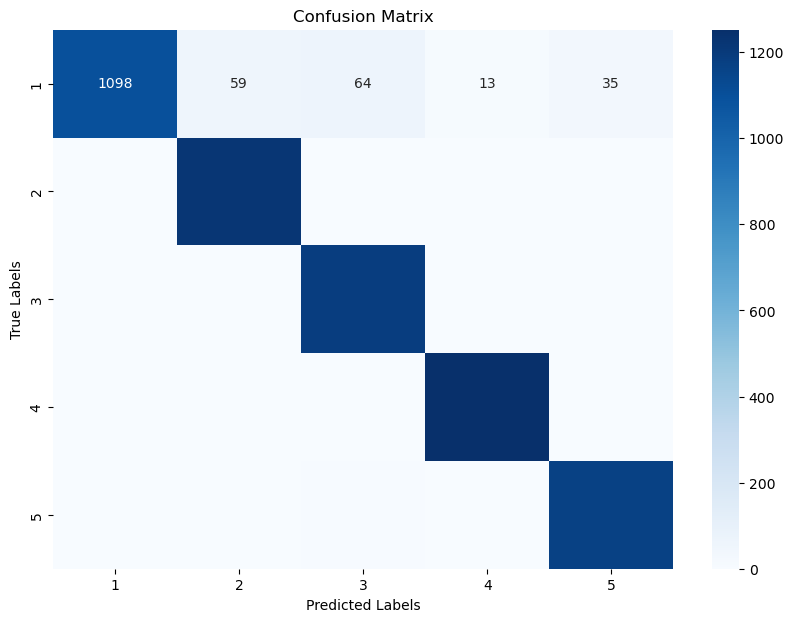

              precision    recall  f1-score   support

           1       1.00      0.87      0.93      1269
           2       0.95      1.00      0.98      1222
           3       0.94      1.00      0.97      1188
           4       0.99      1.00      0.99      1252
           5       0.97      0.99      0.98      1183

    accuracy                           0.97      6114
   macro avg       0.97      0.97      0.97      6114
weighted avg       0.97      0.97      0.97      6114



In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model_lstm.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Mendapatkan kelas prediksi dengan nilai probabilitas tertinggi

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualisasi confusion matrix menggunakan seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_classes, target_names=['1', '2', '3', '4', '5']))

In [31]:
# the accuracy seems pretty good, but lets try with GRU
# build GRU model
model_gru = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=50000, output_dim=100, input_length=maxlen),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.GRU(128, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

model_gru.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [32]:
# train model GRU
history_gru = model_gru.fit(
      X_train, y_train,
      epochs=15,
      batch_size=64,
      validation_data=(X_test, y_test),
      verbose=2,
      callbacks=[reduce_lr_callback, accuracy_early_stopping_callback]
    )

Epoch 1/15
383/383 - 72s - loss: 1.1031 - accuracy: 0.5242 - val_loss: 0.5385 - val_accuracy: 0.8096 - lr: 0.0010 - 72s/epoch - 187ms/step
Epoch 2/15
383/383 - 81s - loss: 0.3939 - accuracy: 0.8687 - val_loss: 0.2310 - val_accuracy: 0.9302 - lr: 0.0010 - 81s/epoch - 212ms/step
Epoch 3/15
383/383 - 88s - loss: 0.1812 - accuracy: 0.9446 - val_loss: 0.1636 - val_accuracy: 0.9498 - lr: 0.0010 - 88s/epoch - 230ms/step
Epoch 4/15
383/383 - 80s - loss: 0.1131 - accuracy: 0.9663 - val_loss: 0.1661 - val_accuracy: 0.9550 - lr: 0.0010 - 80s/epoch - 210ms/step
Epoch 5/15
383/383 - 82s - loss: 0.0803 - accuracy: 0.9762 - val_loss: 0.1398 - val_accuracy: 0.9648 - lr: 0.0010 - 82s/epoch - 214ms/step
Epoch 6/15
383/383 - 86s - loss: 0.0665 - accuracy: 0.9803 - val_loss: 0.1242 - val_accuracy: 0.9694 - lr: 0.0010 - 86s/epoch - 223ms/step
Epoch 7/15
383/383 - 81s - loss: 0.0548 - accuracy: 0.9832 - val_loss: 0.1831 - val_accuracy: 0.9576 - lr: 0.0010 - 81s/epoch - 213ms/step
Epoch 8/15

Epoch 8: Reduce

In [33]:
loss, accuracy = model_gru.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {accuracy}')

192/192 - 4s - loss: 0.1242 - accuracy: 0.9694 - 4s/epoch - 23ms/step
Test Accuracy: 0.969414472579956


In [34]:
# saving our models, it's hard to train again
model_gru.save('gru_model_sentiment_analysis.h5')

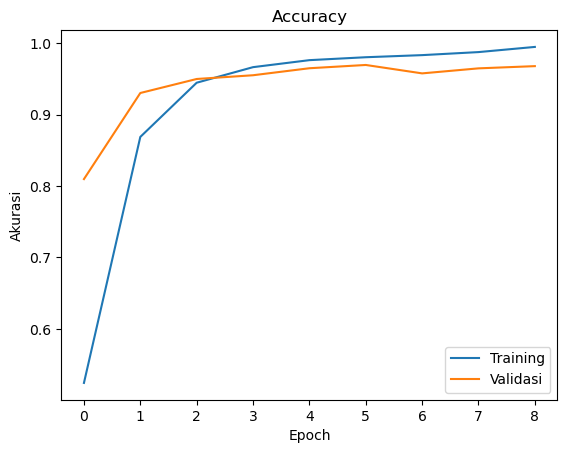

In [35]:
history_gru.history.keys()
plt.plot(history_gru.history['accuracy'])
plt.plot(history_gru.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validasi'], loc='lower right')
plt.show()

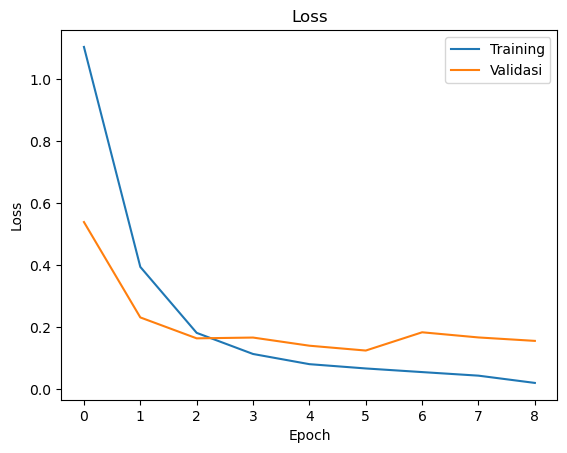

In [36]:
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validasi'], loc='upper right')

192/192 [==============================] - 5s 23ms/step


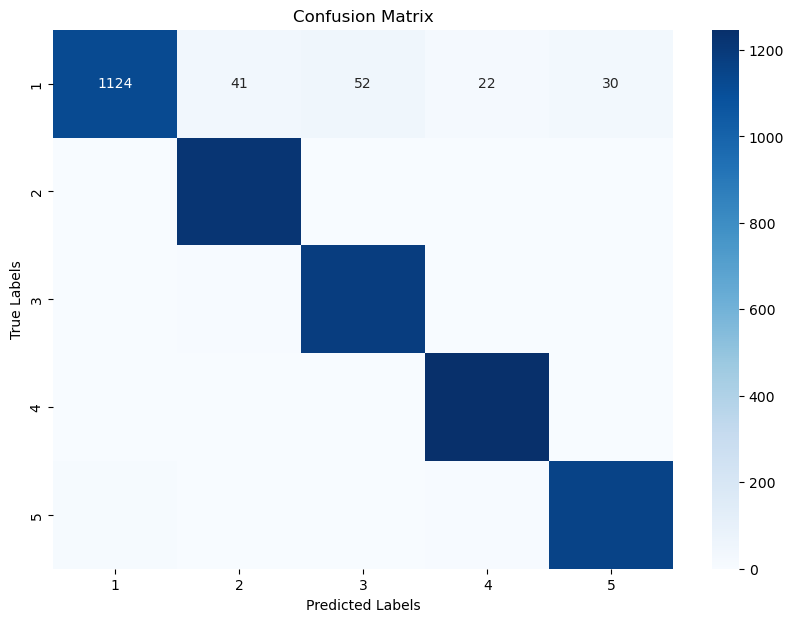

              precision    recall  f1-score   support

           1       0.98      0.89      0.93      1269
           2       0.96      1.00      0.98      1222
           3       0.96      0.99      0.97      1188
           4       0.98      1.00      0.99      1252
           5       0.97      0.98      0.98      1183

    accuracy                           0.97      6114
   macro avg       0.97      0.97      0.97      6114
weighted avg       0.97      0.97      0.97      6114



In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model_gru.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Mendapatkan kelas prediksi dengan nilai probabilitas tertinggi

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualisasi confusion matrix menggunakan seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_classes, target_names=['1', '2', '3', '4', '5']))

In [38]:
import numpy as np
def predict_text(text: str, model, isTfidf: bool) ->str:
    # cleansing kalimat baru
    clean_text = text_cleaning(text)
    casefold_text = case_folding(clean_text)
    replace_slang_text = replace_slang_words(casefold_text)
    tokenizing_text = text_tokenizing(replace_slang_text)
    stopword_text = remove_stopwords(tokenizing_text)
    if isTfidf:
        X_text = vectorizer.transform([stopword_text])
    else:
        # sequence model
        X_text = text_padding([stopword_text])


    prediction = model.predict(X_text)

    if isTfidf:
        predicted_label = prediction[0]
        print(f'Prediction Value : {prediction}')
        label = [1, 2, 3, 4, 5]
    else:
        predicted_label = np.argmax(prediction, axis=1)
        print(f'Prediction Value : {prediction}')
        predict_proba = sorted(prediction[0])[4]
        print("Probability: ", round(predict_proba*100,2), "%")
        label = [0, 1, 2, 3, 4]


    if predicted_label == label[0]:
        return 'VERY NEGATIVE'
    elif predicted_label == label[1]:
        return 'NEGATIVE'
    elif predicted_label == label[2]:
        return 'NEUTRAL'
    elif predicted_label == label[3]:
        return 'POSITIVE'
    elif predicted_label == label[4]:
        return 'VERY POSITIVE'

    return ""

In [39]:
    # 'title': ['Great app!', 'Needs improvement', 'Amazing experience'],
    # 'review': ['I really enjoyed using this app. It is very user-friendly.',
    #            'The app crashes often and has many bugs.',
    #            'Excellent app with many useful features. Highly recommend it!'],

In [40]:
# testing kalimat baru dengan svm 
import joblib
new_model_svc = joblib.load('svm_model.pkl')
kalimat_baru = input("Masukkan kalimat baru: ")
print(f'Kalimat : {kalimat_baru}')
pred_label = predict_text(kalimat_baru, new_model_svc, True)
print(f'Sentimen kalimat : {pred_label}')

Kalimat : Amazing experience Excellent app with many useful features. Highly recommend it!
Prediction Value : [5]
Sentimen kalimat : VERY POSITIVE


In [41]:
#  testing kalimat baru dengan LSTM 
model_lstm = tf.keras.models.load_model('lstm_model_sentiment_analysis.h5')
kalimat_baru = input("Masukkan kalimat baru: ")
print(f'Kalimat : {kalimat_baru}')
pred_label = predict_text(kalimat_baru, model_lstm, False)
print(f'Sentimen kalimat : {pred_label}')

Kalimat : I wanna ask something, how to buy on amazon
1/1 [==============================] - 0s 158ms/step
Prediction Value : [[8.7672826e-03 4.9130773e-05 9.9037194e-01 1.6744633e-04 6.4427365e-04]]
Probability:  99.04 %
Sentimen kalimat : NEUTRAL


In [42]:
#  testing kalimat baru dengan LSTM 
kalimat_baru = input("Masukkan kalimat baru: ")
print(f'Kalimat : {kalimat_baru}')
pred_label = predict_text(kalimat_baru, model_lstm, False)
print(f'Sentimen kalimat : {pred_label}')

Kalimat : Amazing experience Excellent app with many useful features. Highly recommend it!
1/1 [==============================] - 0s 21ms/step
Prediction Value : [[2.6816318e-07 2.2565536e-15 4.2097289e-12 1.2931259e-08 9.9999976e-01]]
Probability:  100.0 %
Sentimen kalimat : VERY POSITIVE


In [43]:
#  testing kalimat baru dengan LSTM 
kalimat_baru = input("Masukkan kalimat baru: ")
print(f'Kalimat : {kalimat_baru}')
pred_label = predict_text(kalimat_baru, model_lstm, False)
print(f'Sentimen kalimat : {pred_label}')

Kalimat : This product is very disappointing, poor quality, and not as described.
1/1 [==============================] - 0s 21ms/step
Prediction Value : [[1.3666606e-04 9.9985611e-01 7.1540253e-06 1.5432265e-11 8.5810794e-12]]
Probability:  99.99 %
Sentimen kalimat : NEGATIVE


In [44]:
#  testing kalimat baru dengan LSTM 
kalimat_baru = input("Masukkan kalimat baru: ")
print(f'Kalimat : {kalimat_baru}')
pred_label = predict_text(kalimat_baru, model_lstm, False)
print(f'Sentimen kalimat : {pred_label}')

Kalimat : This product is pretty good and matches the description, I am satisfied with this purchase.
1/1 [==============================] - 0s 21ms/step
Prediction Value : [[5.7860780e-07 6.7878814e-11 4.1251681e-08 9.9999464e-01 4.8108068e-06]]
Probability:  100.0 %
Sentimen kalimat : POSITIVE


In [45]:
#  testing kalimat baru dengan LSTM 
kalimat_baru = input("Masukkan kalimat baru: ")
print(f'Kalimat : {kalimat_baru}')
pred_label = predict_text(kalimat_baru, model_lstm, False)
print(f'Sentimen kalimat : {pred_label}')

Kalimat : Your app is dumb ass, useless, and to many bugs
1/1 [==============================] - 0s 20ms/step
Prediction Value : [[9.9973756e-01 6.5734552e-05 1.8837208e-04 2.3075206e-06 6.0089765e-06]]
Probability:  99.97 %
Sentimen kalimat : VERY NEGATIVE


In [46]:
#  testing kalimat baru dengan GRU
model_gru = tf.keras.models.load_model('gru_model_sentiment_analysis.h5')
kalimat_baru = input("Masukkan kalimat baru: ")
print(f'Kalimat : {kalimat_baru}')
pred_label = predict_text(kalimat_baru, model_gru, False)
print(f'Sentiment kalimat : {pred_label}')

Kalimat : I wanna ask something, how to buy on amazon
1/1 [==============================] - 0s 177ms/step
Prediction Value : [[3.06778867e-02 7.52705289e-03 9.60573673e-01 1.02067024e-04
  1.11931888e-03]]
Probability:  96.06 %
Sentiment kalimat : NEUTRAL


In [47]:
#  testing kalimat baru dengan GRU
kalimat_baru = input("Masukkan kalimat baru: ")
print(f'Kalimat : {kalimat_baru}')
rating = predict_text(kalimat_baru, model_gru, False)
print(f'Sentimen kalimat : {rating}')

Kalimat : Amazing experience Excellent app with many useful features. Highly recommend it!
1/1 [==============================] - 0s 28ms/step
Prediction Value : [[2.7538232e-09 7.9299075e-21 5.8649599e-18 6.3179952e-13 1.0000000e+00]]
Probability:  100.0 %
Sentimen kalimat : VERY POSITIVE


In [48]:
#  testing kalimat baru dengan GRU
kalimat_baru = input("Masukkan kalimat baru: ")
print(f'Kalimat : {kalimat_baru}')
pred_label = predict_text(kalimat_baru, model_gru, False)
print(f'Sentimen kalimat : {pred_label}')

Kalimat : This product is very disappointing, poor quality, and not as described.
1/1 [==============================] - 0s 32ms/step
Prediction Value : [[3.8161494e-02 9.4897848e-01 1.2858757e-02 1.9141902e-08 1.2971725e-06]]
Probability:  94.9 %
Sentimen kalimat : NEGATIVE


In [49]:
#  testing kalimat baru dengan GRU
kalimat_baru = input("Masukkan kalimat baru: ")
print(f'Kalimat : {kalimat_baru}')
pred_label = predict_text(kalimat_baru, model_gru, False)
print(f'Sentimen kalimat : {pred_label}')

Kalimat : This product is pretty good and matches the description, I am satisfied with this purchase.
1/1 [==============================] - 0s 21ms/step
Prediction Value : [[8.8291245e-06 1.5326073e-12 9.7946759e-07 9.9995542e-01 3.4815017e-05]]
Probability:  100.0 %
Sentimen kalimat : POSITIVE


In [50]:
#  testing kalimat baru dengan GRU
kalimat_baru = input("Masukkan kalimat baru: ")
print(f'Kalimat : {kalimat_baru}')
pred_label = predict_text(kalimat_baru, model_gru, False)
print(f'Sentimen kalimat : {pred_label}')

Kalimat : Your app is dumb ass, useless, and to many bugs
1/1 [==============================] - 0s 19ms/step
Prediction Value : [[9.9832147e-01 1.0693503e-04 1.5713247e-03 1.2832176e-08 2.0750099e-07]]
Probability:  99.83 %
Sentimen kalimat : VERY NEGATIVE
